In [8]:
## Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Data preprocessing

# Import the dataset
dataset = pd.read_csv('50_Startups.csv')

# Matrix of features
x = dataset.iloc[:, :-1].values
print('\nMatrix of features: \n')
print(x)

# Dependent variable vector
y = dataset.iloc[:, -1].values
print('\nDependent variable vector: \n')
print(y)

# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x)) #np.array - converts into numpy array

print('\nMatrix of features after the OneHot encoding: \n')
print(x)


Matrix of features: 

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 30331

In [10]:
# Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
# Feature Scaling - no need - multiple linear regression has parameters that compensate different feature values

In [12]:
# Fitting the model to the training set

# no need for Backward elimination or Dummy variable trap avoiding
# class that builds multiple linear regression automatically takes care of this

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [13]:
# Predicting the test set results

y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)

In [14]:
# Model evaluation using r-squared metrics

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282303

In [15]:
# Visualising the training and test set results - no need, multiple dimensions
# instead: comparing the predicted and real profit vector in the test set

In [16]:
# Comparison of predicted and real profit vectors

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


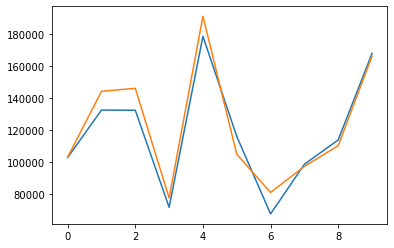

In [17]:
# Visualised comparison of two vectors

plt.plot(y_pred)
plt.plot(y_test)